In [15]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import networkx as nx
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

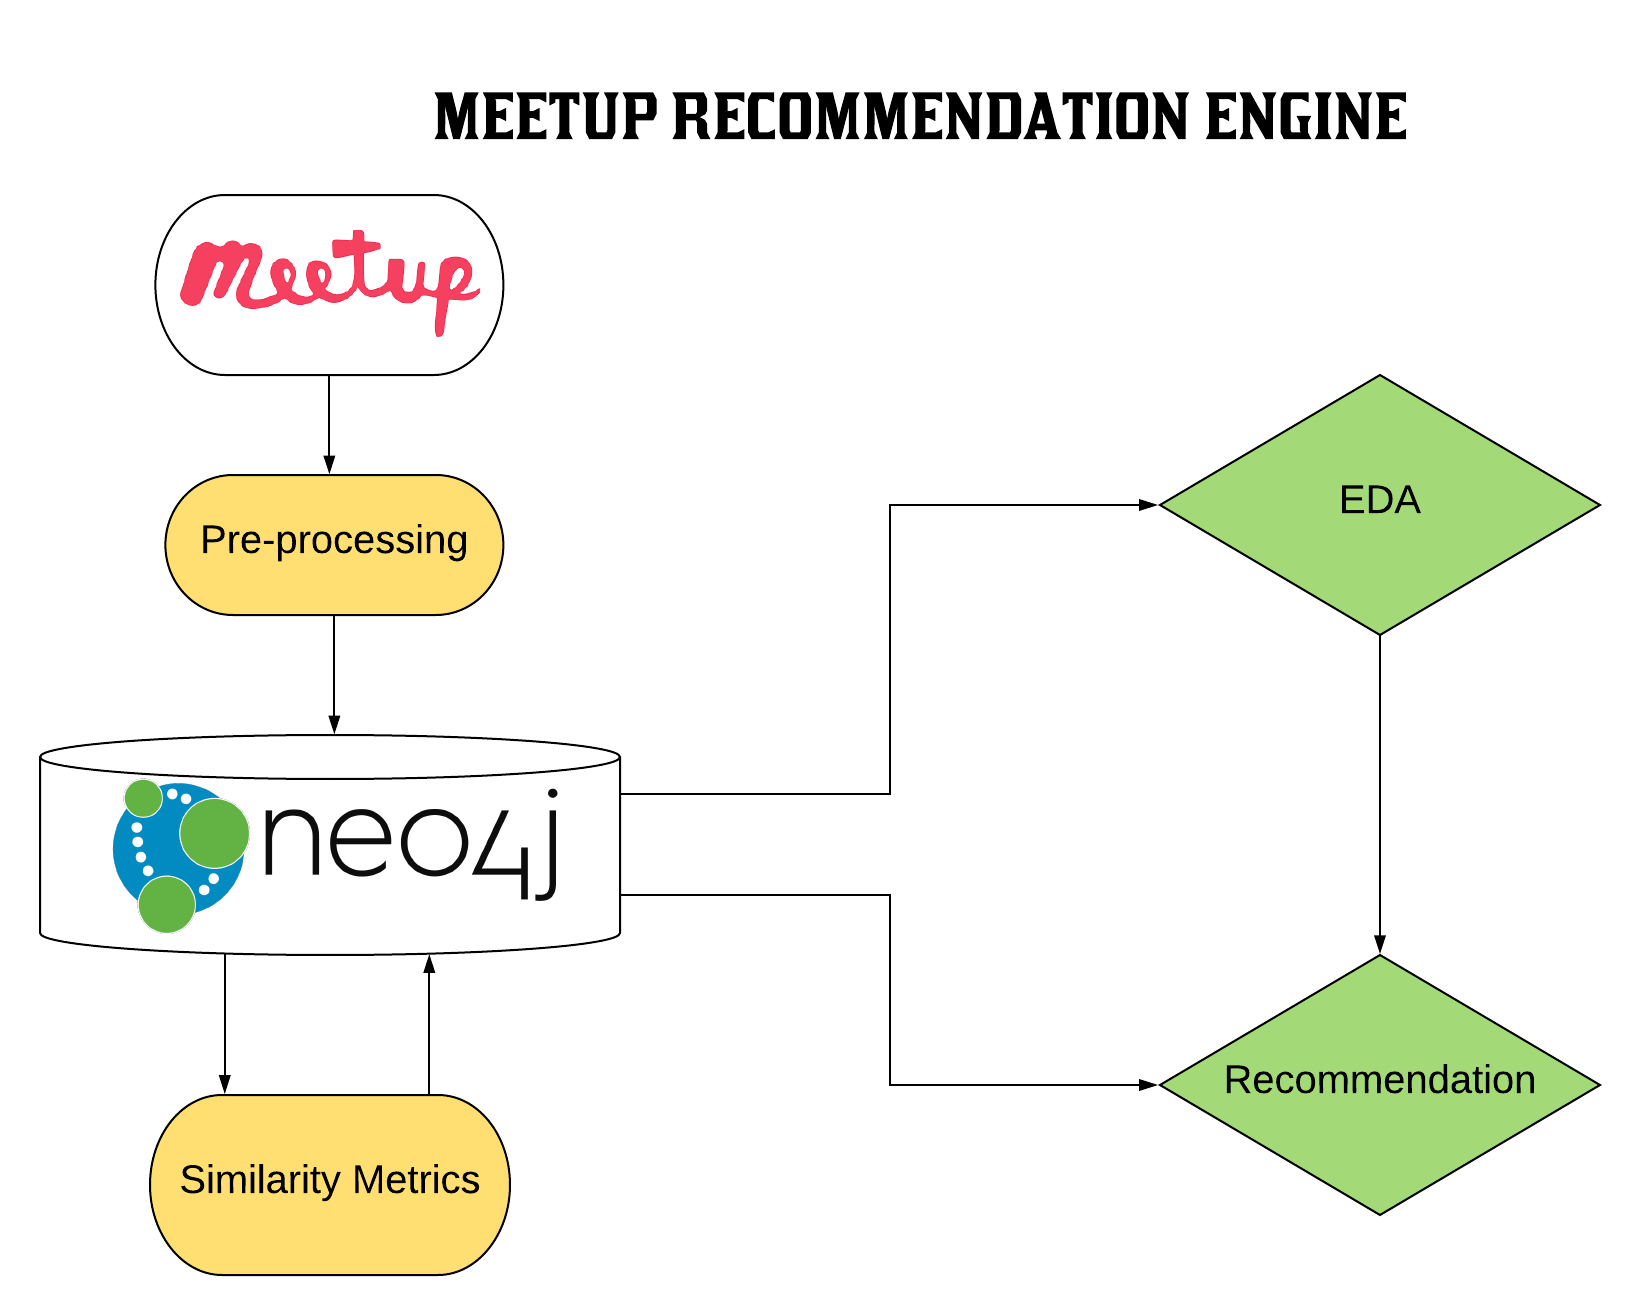

In [14]:
display(Image(filename='workflow2.png'))

### DATABASE ARCHITECTURE

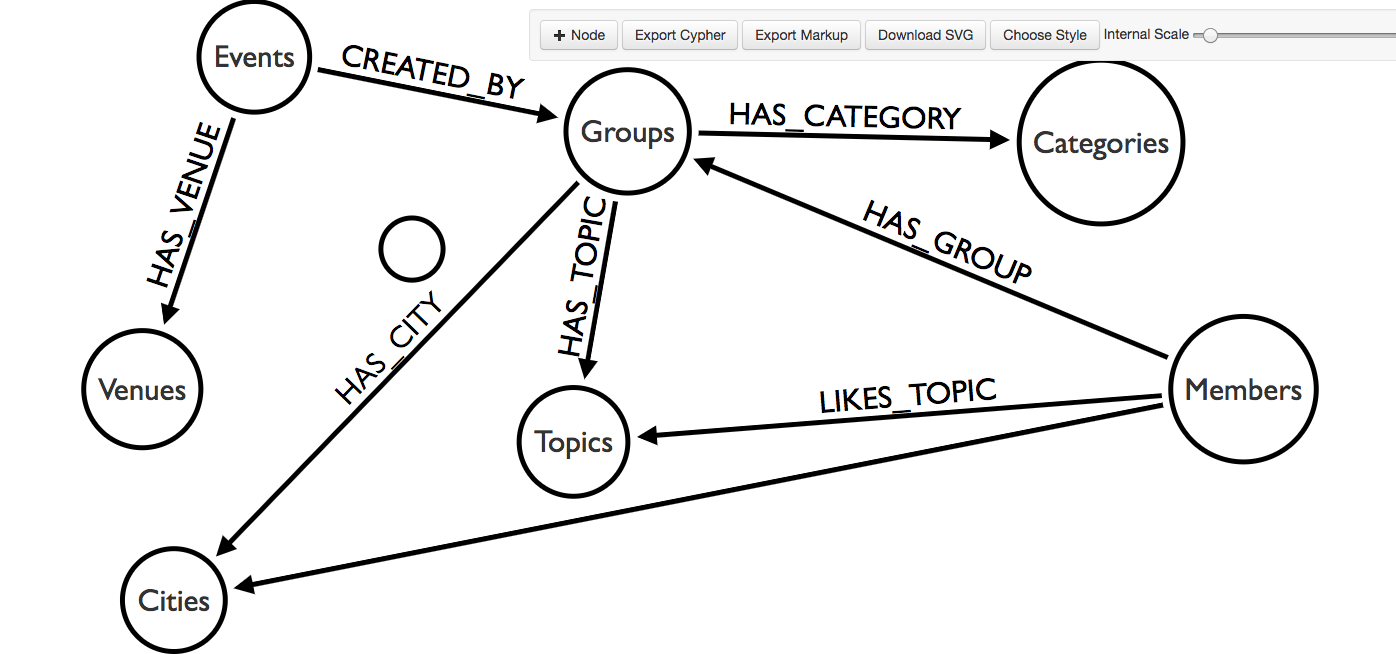

In [80]:
display(Image(filename='db_schema2.png'))

### EDA

## Meetup Groups Clustered by Category

In [79]:
import jgraph

query2 = """
MATCH (g:Groups)-[:HAS_CATEGORY]->(cat:Categories)
RETURN g.name, cat.name
LIMIT 1000
"""

data4 = graph.run(query2)
tup = [tuple(x) for x in data4]

jgraph.draw(tup, shader = 'phong')

In [16]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import py2neo
from py2neo import Graph, ogm
from ipywidgets import widgets, interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output, Markdown, Image
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
import ipywidgets as widget
# from routes import *
import neo4jupyter
neo4jupyter.init_notebook_mode()
from scripts import *
import cypher


<IPython.core.display.Javascript object>

In [17]:
graph = Graph('meetup_db/installation-3.4.6/import', username = 'neo4j', password = 'Evangeline123')

In [18]:
def get_categories():
    statement2 = '''MATCH (g: Groups)-[r:HAS_CATEGORY]->(cat:Categories)
    RETURN cat.name AS category, count(r) AS groups 
    ORDER BY groups DESC                                               
    LIMIT 15'''
    results = graph.run(statement2).data()
    df5 = pd.DataFrame(results)
    return df5

In [19]:
def get_topics_by_group():
    statement = '''MATCH (g: Groups)-[r:HAS_TOPIC]->(t:Topics)
    RETURN t.name AS topic, count(r) AS groups
    ORDER BY groups DESC
    LIMIT 15'''
    results = graph.run(statement).data()
    df = pd.DataFrame(results)
    return df

In [20]:
def get_topics_by_members():
    statement = '''MATCH (m: Members)-[r:LIKES_TOPIC]->(t:Topics)
    RETURN t.name AS topic, count(r) AS members
    ORDER BY members DESC
    LIMIT 15'''
    results = graph.run(statement).data()
    df = pd.DataFrame(results)
    return df

In [21]:
df6 = get_topics_by_group()

### Distribution of Meetup Topics by Groups

/Users/shachiakyaagba/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




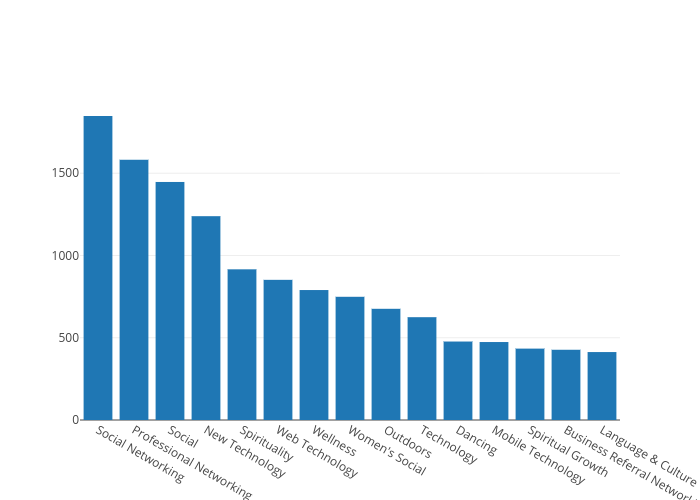

In [76]:
data7 = Data([Bar(x=df6["topic"], y=df6["groups"])])

py.image.ishow({'data': data7})

In [23]:
df6['category'] = ['Socializing', "Career & Business", "Socializing","Tech", "New Age & Spirituality","Tech","Health & Wellbeing", "Socializing", "Outdoors & Adventure","Tech", "Dancing","Tech","New Age & Spirituality", "Career & Business", "Language & Ethnic Identity" ]

In [24]:
grouped_groups = df6.groupby('category', as_index = False).sum()


In [25]:
normalized_df1=(grouped_groups['groups']-grouped_groups['groups'].min())/(grouped_groups['groups'].max()-grouped_groups['groups'].min())


In [26]:
grouped_groups['category_norm'] = normalized_df1


In [27]:
grouped_groups.set_index('category', inplace = True)

In [28]:
grouped_groups.rename(columns = {'category_norm': 'groups1'}, inplace = True)

### Distribution of Meetup Topics by Members

In [29]:
df7 = get_topics_by_members()

In [30]:
df6['category'] = ['Socializing', "Career & Business", "Socializing","Tech", "New Age & Spirituality","Tech","Health & Wellbeing", "Socializing", "Outdoors & Adventure","Tech", "Dancing","Tech","New Age & Spirituality", "Career & Business", "Language & Ethnic Identity" ]

In [31]:
df7['category'] = ["Outdoors & Adventure", "Tech", "Arts & Culture", "Movies & Film", "Food & Drink", "Music", "Movies & Film", "Sports & Recreation", 'Socializing', "Health & Wellbeing", "Photography", "Language & Ethnic Identity", "Socializing", "Dancing", "Socializing"]

In [32]:
grouped_members = df7.groupby('category', as_index = False).sum()

In [33]:
normalized_df=(grouped_members['members']-grouped_members['members'].min())/(grouped_members['members'].max()-grouped_members['members'].min())

In [34]:
grouped_members['members1'] = normalized_df

In [35]:
grouped_members.rename(columns = {'category_norm': 'members1'}, inplace = True)

In [36]:
grouped_members.set_index('category', inplace = True)

/Users/shachiakyaagba/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




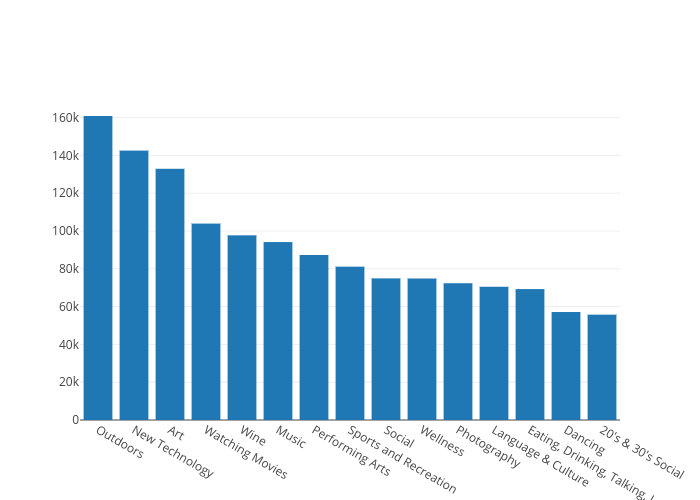

In [75]:

data8 = Data([Bar(x=df7["topic"], y=df7["members"])])

py.image.ishow({'data': data8})

## Supply and Demand for Meetup Groups

I performed some feature engineering to arrive at the supply and demand metrics. Members have topics they are interested in and Groups have topics and categories they fall under. Members don't hve direct categories attached to them but their categories can be inferred from the topics they are interested in. 
I proceeded to attach a category to every topic. I then got the member and group counts for the topics that accounted for 80% of member and group populations. I proceeded to standardize the member and group frequencies in order to carry out direct comparisons.
The result can be seen below.

/Users/shachiakyaagba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


<Figure size 1440x1440 with 0 Axes>

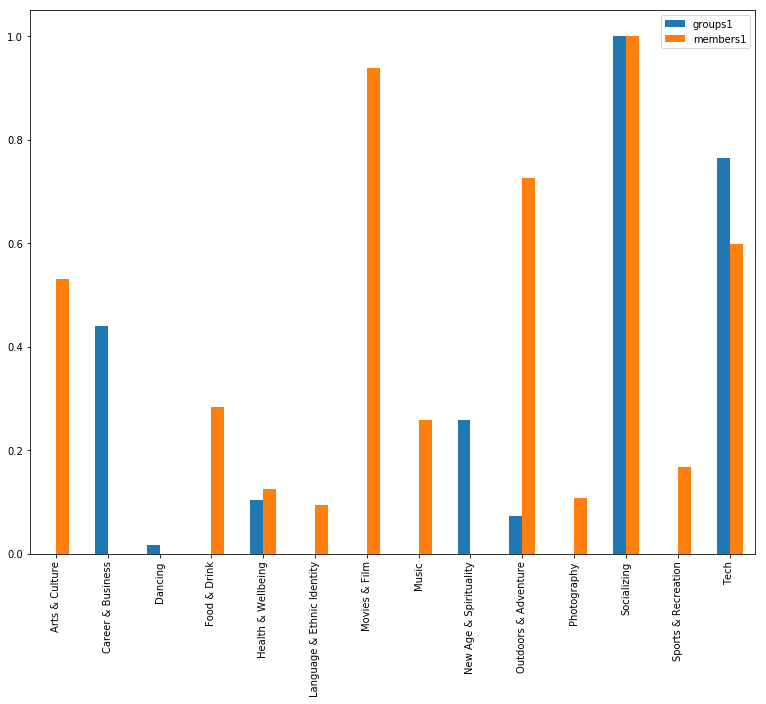

In [38]:
plt.figure(figsize=(20,20))
pd.concat(
    [grouped_groups['groups1'], grouped_members['members1']],
    axis=1).plot.bar(figsize = (13,10))

From above it is evident that there is a shortfall of groups in the following categories:
Movies, 
Food & Drink, 
Sports and Recreation, 
Music. 
There are a surplus of Tech, Spirituality, Career and Dancing Groups

## Distribution of Meetup Groups by Categories

In [39]:
df5 = get_categories()


/Users/shachiakyaagba/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




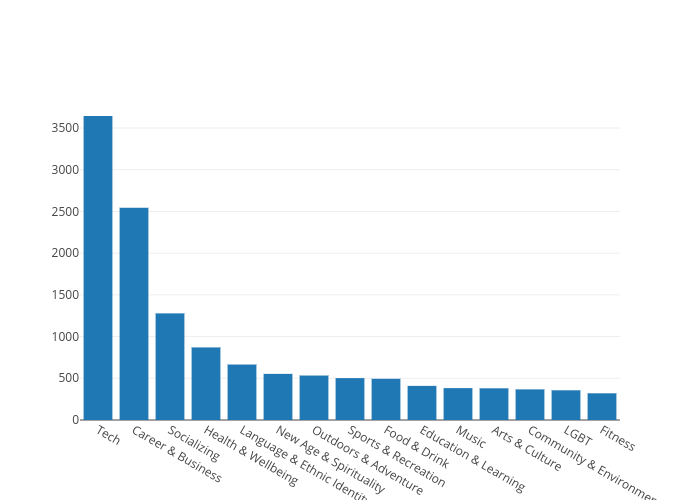

In [74]:
data = Data([Bar(x=df5["category"], y=df5["groups"])])

py.image.ishow({'data': data})

## Heatmaps of co-occurence of members among meetup groups

In [41]:
%load_ext cypher
import plotly.plotly as py
from plotly.graph_objs import *

In [42]:
def get_co_occurence():
    statement = '''MATCH (g:Groups)                                                 
    WITH g, size(()-[:HAS_GROUP]->(g)) AS members          
    ORDER BY members DESC                                       
    LIMIT 15                                                         
    WITH collect(g) AS top_g                                         
    UNWIND top_g AS g1                                               
    UNWIND top_g AS g2                                               
    MATCH (g1)<-[:HAS_GROUP]-()-[:HAS_GROUP]->(g2) 
    WHERE g1.name < g2.name                                          
    RETURN g1.name as group_a, g2.name as group_b, count(*) AS weight                      
    ORDER BY weight DESC'''
    results = graph.run(statement).data()
    df = pd.DataFrame(results)
    return results, df

In [43]:
data_occurrence, df4 = get_co_occurence()
df4.head()

,group_a,group_b,weight
0,Members,awesome people in Chicago,10942
1,Friends,Members,8607
2,Friends,awesome people in Chicago,4770
3,Data Enthusiasts,Members,2749
4,Creative Networkers,Members,2743


In [44]:
names = list(set(list(df4["group_a"]) + list(df4["group_b"])))
heat = [[0 for i in range(len(names))] for j in range(len(names))] 

for idx, row in df4.iterrows():
    i = names.index(row["group_a"])
    j = names.index(row["group_b"])
    heat[i][j] = row["weight"]

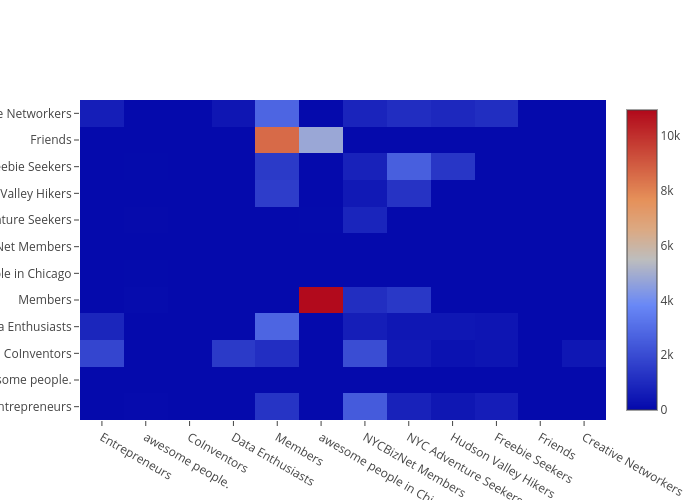

In [45]:
import plotly.graph_objs as go

data2 = [go.Heatmap(z = heat, x = names, y = names)]
py.image.ishow({'data': data2})

In [46]:
from igraph import Graph as IGraph

query = """
MATCH (m:Members)
WITH m, size((m)-[:HAS_GROUP]->()) AS groups
ORDER BY groups DESC
LIMIT 100

WITH collect(m) AS top_m
UNWIND top_m AS m1
UNWIND top_m AS m2

MATCH (m1)-[:HAS_GROUP]->()<-[:HAS_GROUP]-(m2)
WHERE m1.member_id < m2.member_id
RETURN m1.member_id, m2.member_id, count(*) AS weight
ORDER BY weight DESC
"""

data3 = graph.run(query)

ig = IGraph.TupleList(data3, weights=True)
ig

## Which members have the highest betweenness?

$betweenness(v) = \sum_{s, t \in V} \frac{\sigma_{st}(v)}{\sigma_{st}}$

The betweenness centrality of a node $v$ is the number of shortest paths that pass through $v$, $\sigma_{st}(v)$, divided by the total number of shortest paths, $\sigma_{st}$.

In [47]:
between = [(node["name"], node.betweenness()) for node in ig.vs]
top = sorted(between, key=lambda x: x[1], reverse=True)
top[:5]

[('195425500', 93.36403520844328),
 ('190974951', 89.75961740878803),
 ('65246162', 72.47072851989915),
 ('103035902', 67.37787372844018),
 ('19098391', 66.53643494097638)]

## Community Detection

In [48]:
clusters = IGraph.community_walktrap(ig, weights="weight")
clusters = clusters.as_clustering()
len(clusters)

10

In [50]:
nodes1 = [{"id": node.index, "label": node["name"]} for node in ig.vs]

for node in nodes1:
    node["group"] = clusters.membership[node["id"]]
    
nodes1[:5]

[{'id': 0, 'label': '234109385', 'group': 0},
 {'id': 1, 'label': '3893698', 'group': 0},
 {'id': 2, 'label': '12093969', 'group': 1},
 {'id': 3, 'label': '1237529', 'group': 1},
 {'id': 4, 'label': '47415772', 'group': 1}]

In [51]:
edges1 = [{"from": x[0], "to": x[1]} for x in ig.get_edgelist()]
edges1[:5]

[{'from': 0, 'to': 1},
 {'from': 2, 'to': 3},
 {'from': 3, 'to': 4},
 {'from': 3, 'to': 5},
 {'from': 2, 'to': 6}]

In [52]:
import json
from IPython.display import IFrame
import json
import uuid

In [53]:
unique_id = str(uuid.uuid4())

In [54]:
def viz(nodes, edges, physics = False):
    html = """
    <html>
    <head>
      <script type="text/javascript" src="../lib/vis/dist/vis.js"></script>
      <link href="../lib/vis/dist/vis.css" rel="stylesheet" type="text/css">
    </head>
    <body>

    <div id="{id}"></div>

    <script type="text/javascript">
      var nodes = {nodes};
      var edges = {edges};

      var container = document.getElementById("{id}");

      var data = {{
        nodes: nodes,
        edges: edges
      }};

      var options = {{
          nodes: {{
              shape: 'dot',
              size: 25,
              font: {{
                  size: 14
              }}
          }},
          edges: {{
              font: {{
                  size: 14,
                  align: 'middle'
              }},
              color: 'gray',
              arrows: {{
                  to: {{enabled: true, scaleFactor: 0.5}}
              }},
              smooth: {{enabled: false}}
          }},
          physics: {{
              enabled: {physics}
          }}
      }};

      var network = new vis.Network(container, data, options);

    </script>
    </body>
    </html>
    """
    html = html.format(id=unique_id, nodes=json.dumps(nodes), edges=json.dumps(edges), physics=json.dumps(physics))
    return html
    

In [55]:
html = viz(nodes = nodes1, edges = edges1, physics = True)

In [136]:
filename = "figure/graph-{}.html".format(unique_id)

In [138]:
file = open(filename, "w")

In [141]:
file.close()

In [56]:
#Get group get_ids
def get_group_ids():
    statement = '''MATCH (g:Groups)
    RETURN g.group_id as ID'''
    results = graph.run(statement).data()
    df1 = pd.DataFrame(results)
    return df1

In [57]:
df1 = get_group_ids()

In [58]:
#Get random_member_id
def random_group_id():
    random_group_id = df1['ID'].sample(1).iloc[0]
    return random_group_id

In [59]:
#Get member id
def get_member_ids():
    statement = '''MATCH (m:Members)
    RETURN m.member_id as ID'''
    results = graph.run(statement).data()
    df = pd.DataFrame(results)
    return df

In [60]:
df = get_member_ids()

In [61]:
#Get random_member_id
def random_member_id():
    random_member_id = df['ID'].sample(1).iloc[0]
    return random_member_id
    

In [62]:
#Get member info
def get_member_info(member_id):
    statement = '''Match (m:Members)-[:HAS_GROUP]->(g:Groups)
    WHERE m.member_id = {A}
    RETURN m.member_id AS Member_id, g.name AS Group_name'''
    results = graph.run(statement, {"A":member_id}).to_table()
    display(results)
    return results

In [63]:
#Get Group Info
def get_group_info(group_id):
    statement = '''Match (g:Groups)-[:HAS_CATEGORY]->(cat:Categories)
    WHERE g.group_id = {A}
    RETURN g.group_id AS ID, g.name AS Group_name, cat.name as Category'''
    results = graph.run(statement, {"A":group_id}).to_table()
    display(results)
    return results

In [64]:
#Get top 10 Categories
def top_10_topics_by_members():
    statement = '''MATCH (t:Topics)<-[r:LIKES_TOPIC]-(m:Members)
    RETURN t.topic_id as Topic_id, t.name as Topic, count(r) as  num_of_members
    ORDER BY num_of_members DESC LIMIT 10'''
    results = graph.run(statement).to_table()
    display(results)
    return results

In [65]:
#Get the top 20 Topics liked by groups
def top_10_topics_by_groups():
    statement = '''MATCH (t:Topics)<-[r:HAS_TOPIC]-(g:Groups)
    RETURN t.topic_id as Topic_id, t.name as Topic, count(r) as  num_of_groups
    ORDER BY num_of_groups DESC LIMIT 10'''
    results = graph.run(statement).to_table()
    display(results)
    return results

In [66]:
#Get top 20 Categories
def top_10_categories():
    statement = '''
    MATCH (cat:Categories)<-[r:HAS_CATEGORY]-(g:Groups)
    RETURN cat.category_id as ID, cat.name as Category, count(r) as  num_of_groups
    ORDER BY num_of_groups DESC LIMIT 10
    '''
    results = graph.run(statement).to_table()
    display(results)
    return results

In [67]:
#Recommend new meetup groups to members
def member_group_recommendation(member_id):
    statement = '''MATCH (g1:Groups)<-[:HAS_GROUP]-(m:Members)-[:HAS_GROUP]->(g2:Groups)
    MATCH (g2)<-[:HAS_GROUP]-(m2:Members)-[r:HAS_GROUP]->(g3:Groups)
    WHERE m.member_id = {A}
    AND NOT (m)-[:HAS_GROUP]->(g3)
    RETURN g3.group_id as ID, g3.name as Group, count(r) as  num_of_members
    ORDER BY num_of_members DESC LIMIT 10'''
    results = graph.run(statement, {"A": member_id}).to_table()
    display(results)
    return results

In [68]:
#Path taken to arrive at group recommendations
def member_group_recommendation_path(member_id):
    chosen_group_id = input('Enter Group ID to get Shortest Path: ')
    statement = '''MATCH (g1:Groups)<-[:HAS_GROUP]-(m:Members)-[:HAS_GROUP]->(g2:Groups),
    (g2)<-[:HAS_GROUP]-(m2:Members)-[r:HAS_GROUP]->(g3:Groups)
    WHERE m.member_id = {A} and g3.group_id = {B}
    AND NOT (m)-[:HAS_GROUP]->(g3)
    RETURN m.member_id as ID, g2.name as Group_name, m2.member_id as member_id, g3.name as Group_name'''
    results = graph.run(statement, {"A": str(member_id)}, {"B": str(chosen_group_id)}).to_table()
    display(results)
    return results

In [69]:
#Group Collaboration Recommendations
def group_collaboration(group_id):
    statement = """MATCH (g1:Groups)-[r1:HAS_CATEGORY]->(c1:Categories)<-[r2:HAS_CATEGORY]-(g2:Groups)
    MATCH (m:Members)-[r3:HAS_GROUP]->(g2:Groups)
    WHERE g1.group_id = {A}
    RETURN g2.group_id as ID, g2.name as Potential_Partnerships, count(r3) as  num_of_members
    ORDER BY num_of_members DESC LIMIT 100"""
    results = graph.run(statement, {"A": str(group_id)}).to_table()
    display(results)
    return results

## RECOMMENDATIONS FOR MEETUP MEMBERS

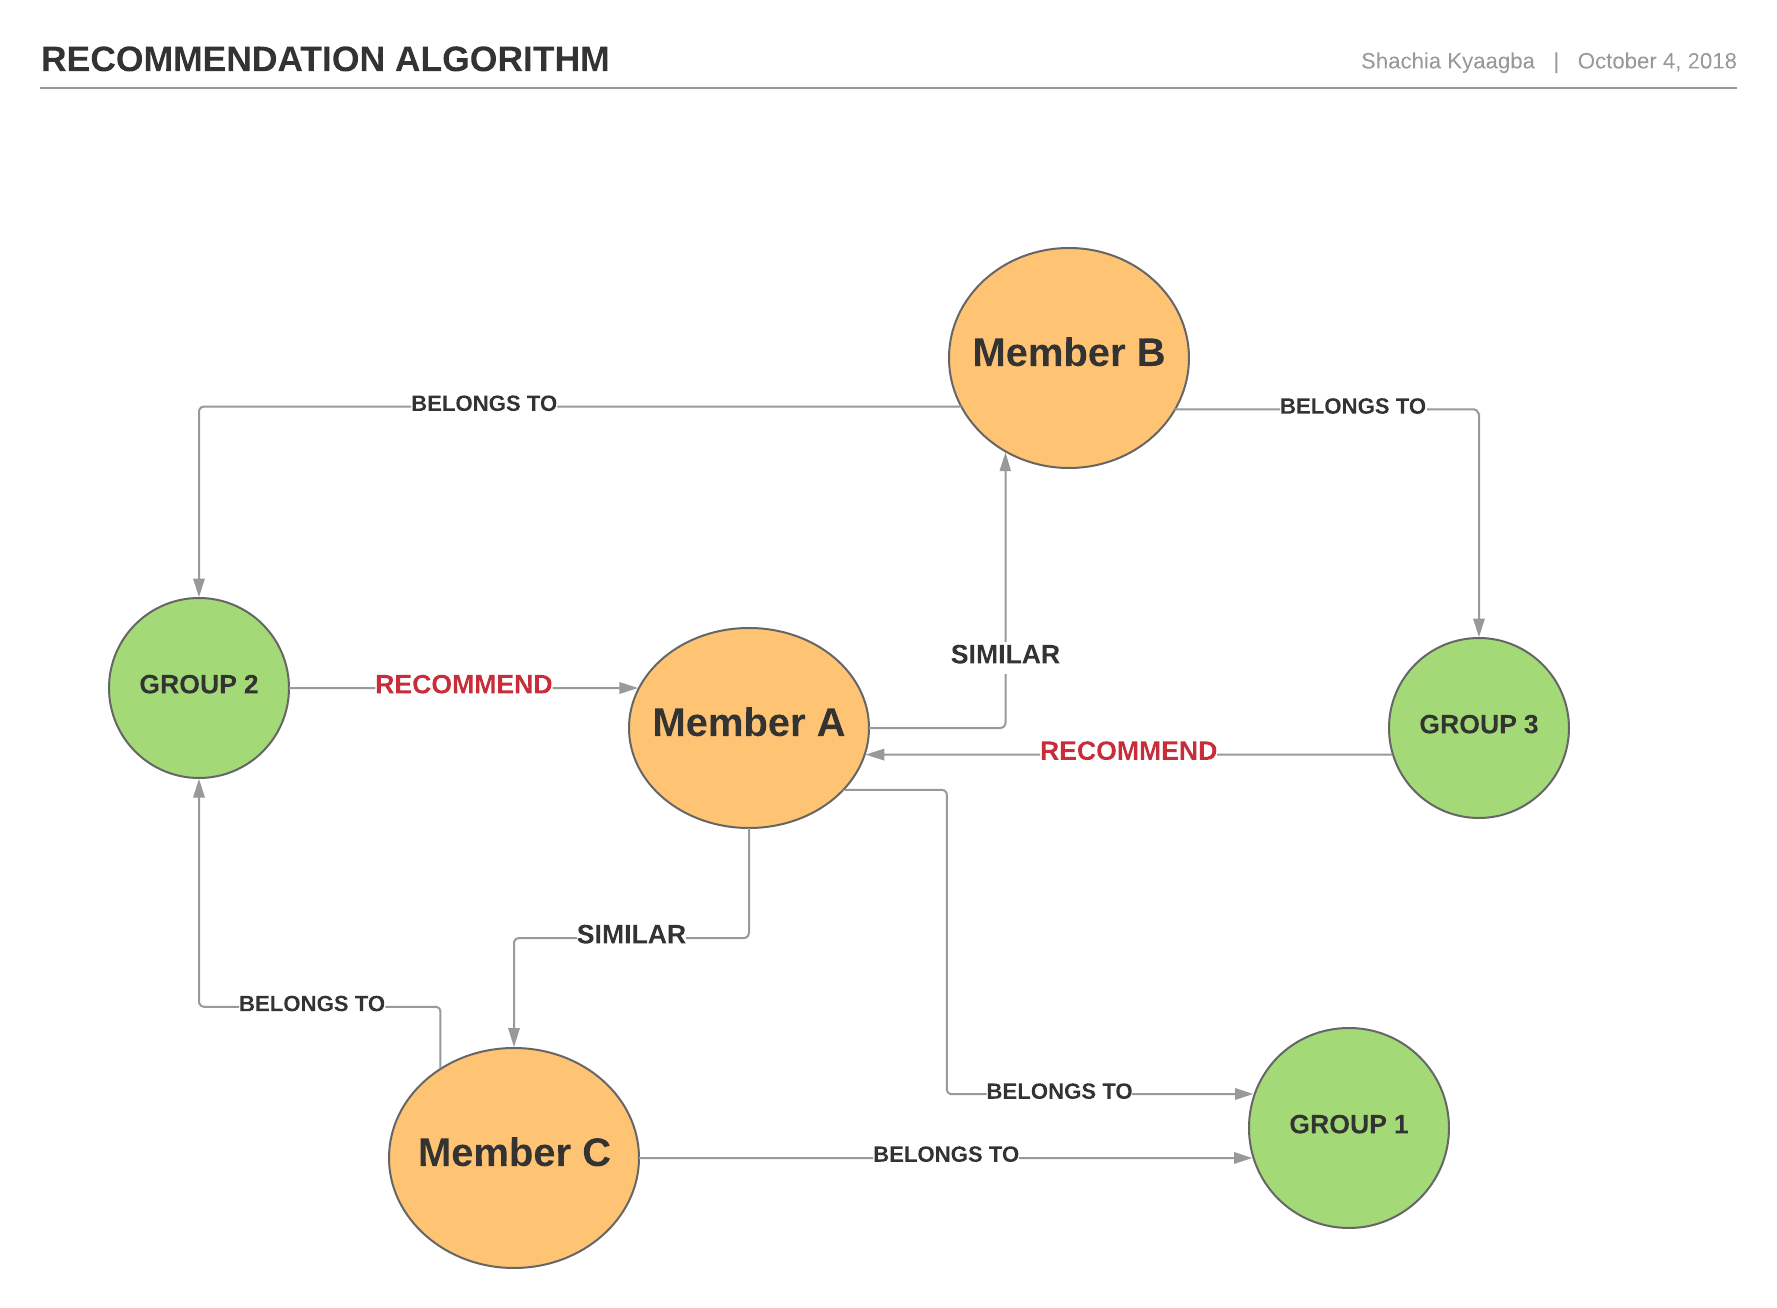

In [81]:
display(Image(filename='recommendation_algorithm.png'))

In [70]:
out=widgets.Output()
button=widgets.Button(description='Get member info')
vbox=widgets.VBox(children=(button, out))
display(vbox)

def on_member_button_clicked(b):
    global memb_id
    with out:
        clear_output(wait=True)
        memb_id = random_member_id()
        get_member_info(memb_id)
button.on_click(on_member_button_clicked)

In [71]:
out1=widgets.Output()
button1=widgets.Button(description='Recommendations!')
vbox1=widgets.VBox(children=(button1, out1))
display(vbox1)

def on_mem_recom_button_clicked(b):
    with out1:
        clear_output(wait=True)
        member_group_recommendation(memb_id)
button1.on_click(on_mem_recom_button_clicked)

## RECOMMENDATIONS FOR MEETUP GROUPS

In [72]:
out2=widgets.Output()
button2=widgets.Button(description='Get Group info')
vbox2=widgets.VBox(children=(button2, out2))
display(vbox2)

def on_group_button_clicked(b):
    global groups_id
    with out2:
        clear_output(wait=True)
        groups_id = random_group_id()
        get_group_info(groups_id)
button2.on_click(on_group_button_clicked)

In [73]:
out3=widgets.Output()
button3=widgets.Button(description='Recommendations!')
vbox3=widgets.VBox(children=(button3, out3))
display(vbox3)

def on_group_recom_button_clicked(b):
    with out3:
        clear_output(wait=True)
        group_collaboration(groups_id)
button3.on_click(on_group_recom_button_clicked)

## NEXT STEPS!

Segment Market by Locations for better market analysis
Incorporate user input into recommendation
Apply Matrix factorization to recommendation algorithm